<a href="https://colab.research.google.com/github/N1a2t3a/.Data_Science/blob/main/HW2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bestsellers with categories.csv')

In [46]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [2]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет? Відповідь: 50

In [4]:
missing_values = df.isna().sum()
print(missing_values)

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


Чи є в якихось змінних пропуски? Відповідь: Ні

In [12]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? Відповідь: Non Fiction, Fiction

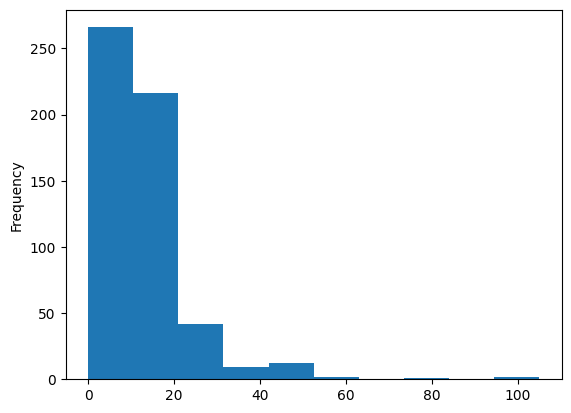

In [29]:
df['price'].plot(kind='hist')
plt.show()

In [20]:
df['price'].max(), df['price'].min(), df['price'].mean(), df['price'].median()

(105, 0, 13.1, 11.0)

Максимальна ціна? Відповідь: 105

Мінімальна ціна? Відповідь: 0

Середня ціна? Відповідь: 13.1

Медіанна ціна? Відповідь: 11.0

 Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [26]:
df['user_rating'].max()

4.9

Скільки книг мають такий рейтинг? Відповідь: 52

In [25]:
len(df[df['user_rating'] == df['user_rating'].max()])

52

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: 277  Publication Manual of the American Psychologic...

In [24]:
top_books_2015 = df[df['year'] == 2015]

most_expensive_2015 = top_books_2015[top_books_2015['price'] == top_books_2015['price'].max()]

print(most_expensive_2015[['name', 'price']])

                                                  name  price
277  Publication Manual of the American Psychologic...     46


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [27]:
fiction_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]

count_fiction_2010 = len(fiction_2010)

print(count_fiction_2010)

20


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [31]:
books = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))]

count_books = len(books)

print(count_books)

1


In [34]:
books_2015_cheap = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_books_2015_cheap = books_2015_cheap.sort_values(by='price')
print(sorted_books_2015_cheap)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

In [36]:
genre_price_stats = df.groupby('genre')['price'].agg(['min', 'max'])
print(genre_price_stats)

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


Максимальна ціна для жанру Fiction: Відповідь: 82

Мінімальна ціна для жанру Fiction: Відповідь: 0

Максимальна ціна для жанру Non Fiction: Відповідь: 105

Мінімальна ціна для жанру Non Fiction: Відповідь: 0

In [38]:
books_per_author = df.groupby('author').agg({'name': 'count'}).reset_index()
books_per_author.columns = ['author', 'book_count']

table_shape = books_per_author.shape
print(table_shape)

author_max_books = books_per_author[books_per_author['book_count'] == books_per_author['book_count'].max()]
max_books_count = author_max_books['book_count'].iloc[0]
print(author_max_books)
print(max_books_count)


(248, 2)
          author  book_count
120  Jeff Kinney          12
12


Якої розмірності вийшла таблиця? Відповідь: (248, 2)

Який автор має найбільше книг? Відповідь: Jeff Kinney

Скільки книг цього автора? Відповідь: 12

In [40]:
author_avg_rating = df.groupby('author')['user_rating'].agg('mean').reset_index()
print(author_avg_rating)

                         author  user_rating
0              Abraham Verghese     4.600000
1                Adam Gasiewski     4.400000
2                 Adam Mansbach     4.800000
3                     Adir Levy     4.800000
4    Admiral William H. McRaven     4.700000
..                          ...          ...
243             Walter Isaacson     4.566667
244               William Davis     4.400000
245            William P. Young     4.600000
246            Wizards RPG Team     4.800000
247                Zhi Gang Sha     4.600000

[248 rows x 2 columns]


In [41]:
min_avg_rating_author = author_avg_rating[author_avg_rating['user_rating'] == author_avg_rating['user_rating'].min()]
print(min_avg_rating_author)

         author  user_rating
71  Donna Tartt          3.9


У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

Який у цього автора середній рейтинг? Відповідь: 3.9

In [43]:
author_books_ratings = pd.concat([books_per_author.set_index('author'), author_avg_rating.set_index('author')], axis=1)
print(author_books_ratings)

                            book_count  user_rating
author                                             
Abraham Verghese                     2     4.600000
Adam Gasiewski                       1     4.400000
Adam Mansbach                        1     4.800000
Adir Levy                            1     4.800000
Admiral William H. McRaven           1     4.700000
...                                ...          ...
Walter Isaacson                      3     4.566667
William Davis                        2     4.400000
William P. Young                     2     4.600000
Wizards RPG Team                     3     4.800000
Zhi Gang Sha                         2     4.600000

[248 rows x 2 columns]


In [53]:
author_books_ratings = author_books_ratings.sort_values(by=['book_count', 'user_rating'])

print(author_books_ratings)

                                    book_count  user_rating
author                                                     
Muriel Barbery                               1     4.000000
Chris Cleave                                 1     4.100000
Ian K. Smith M.D.                            1     4.100000
Pierre Dukan                                 1     4.100000
Elizabeth Strout                             1     4.200000
...                                        ...          ...
American Psychological Association          10     4.500000
Suzanne Collins                             11     4.663636
Gary Chapman                                11     4.736364
Rick Riordan                                11     4.772727
Jeff Kinney                                 12     4.800000

[248 rows x 2 columns]


Який автор перший у списку? Відповідь: Muriel Barbery

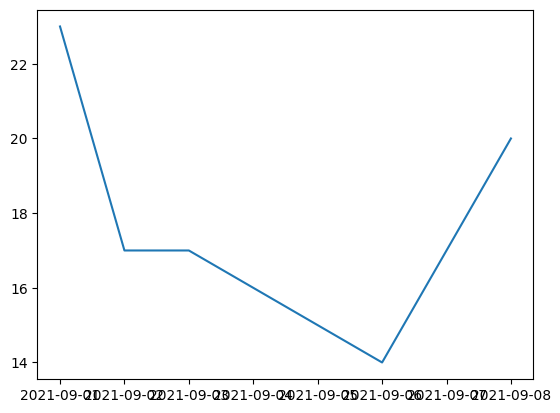

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

date = pd.date_range(start='2023-09-01', freq='D', periods=8)
plt.plot(date, [23, 17, 17, 16, 15, 14, 17, 20])
plt.show()


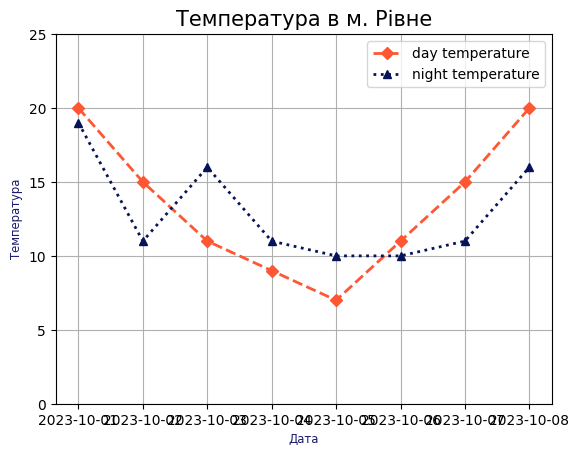

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

date = pd.date_range(start="2023-10-01", freq="D", periods=8)
plt.plot(
    date,
    [20, 15, 11, 9, 7, 11, 15, 20],
    label="day temperature",
    linestyle="--",
    color="#FF5733",
    linewidth=2,
    marker="D",
)
plt.plot(
    date,
    [19, 11, 16, 11, 10, 10, 11, 16],
    label="night temperature",
    linestyle=":",
    color="#061358",
    linewidth=2,
    marker="^",
)
plt.ylim(0, 25)
plt.xlabel("Дата", fontsize="small", color="midnightblue")
plt.ylabel("Температура", fontsize="small", color="midnightblue")
plt.title("Температура в м. Рівне", fontsize=15)
plt.legend()
plt.grid()
plt.show()

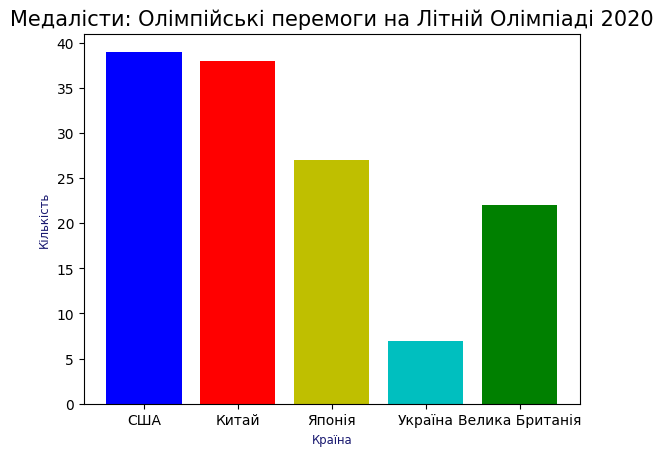

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(
    ["США", "Китай", "Японія", "Україна", "Велика Британія"],
    [39, 38, 27, 7, 22],
    color=["b", "r", "y", "c", "g"],
)

plt.xlabel("Країна", fontsize="small", color="midnightblue")
plt.ylabel("Кількість", fontsize="small", color="midnightblue")
plt.title("Медалісти: Олімпійські перемоги на Літній Олімпіаді 2020", fontsize=15)
plt.show()
